In [1]:
import numpy as np
from matplotlib import pyplot as plt



# Code to Estimate magnetar rate in M77, M82

In [13]:
#Milky Way parameters
N_MW = 31 #number of magnetars in MW
SFR_MW = 1.65 #Msun/yr

#max and min energies of SGR 1935
E_0 = 2e34 #erg
E_max = (1e-5)*(3e49)*(((2e14)/(1e16))**2) #erg

#DSN antenna parameters
chan_bw = 360e6 #Hz
F = (1e-23)*2*(100**2)/1000 #erg/(m2 Hz)  fluence threshold
wav = (3e8)/(8370e6) #m
A = np.pi*((34/2)**2) #eff. area, m^2
G = 1#4*np.pi*A/(wav**2)


#Northern Cross antenna parameters
chan_bw = 16e6 #Hz
F_Jyms = 38 #Jy-ms
F = (1e-23)*F_Jyms*(100**2)/1000
wav = (3e8)/(408e6) #m
A = 0.71*11280 #m^2
G = 1#4*np.pi*A/(wav**2)

#properties of galaxies
NC_GALAXIES = ['M31', 'IC342', 'M82', 'M101', 'NGC6946', 'M106', 'M66']

D_M77 = 14.4*3e22 #m
D_M82 = 3.6*3e22 #m
D_M31 = 0.79*3e22 #m
D_NC_ALL = np.array([0.79,3.3,3.53,6.4,7.7,7.8,11.1])*3e22 #m



SFR_M77 = 30 #234 #Msun/yr
SFR_M82 = 13#23.4 #Msun/yr
SFR_M31 = 0.35 #Msun/yr
SFR_NC_ALL = np.array([0.35,2.8,13,2.9,4.3,2.8,2.7]) #Msun/yr

Tobs_NC_ALL = np.array([51,102,184,96,115,84,63]) #hr
Tobs_M77 = 44.3
Tobs_M82= 34.7

In [14]:
#function for total rate 
def Rate_gamma(lambda_mag,gamma,SFR,D):
    E_min = 4*np.pi*(D**2)*chan_bw*F/G#erg
    #print("Emin: " + str(E_min) + " erg")
    #if E0 < Emin, use Heaviside function, etc.
    if E_0 < E_min:

        coeff = ((E_max**(1-gamma)) - (E_min**(1-gamma)))/((E_max**(1-gamma)) - (E_0**(1-gamma)))
        #print(E_min,E_max,E_0)
        R = (N_MW*SFR*lambda_mag/SFR_MW)*coeff
        #print((N_MW*SFR*lambda_mag/SFR_MW))
        #print(coeff)
        #print(((E_max**(1-gamma)) - (E_0**(1-gamma))))
        #print(E_max,E_0,E_min)
        #plt.plot(R)
    #otherwise, energy dependence cancels
    else:
        #print("E_0 > E_min")
        R = (N_MW*SFR*lambda_mag/SFR_MW)
        
    return R
    
    

Minimum Burst Energy for SGR-like burst in each galaxy:

M31 Emin: 4.291510063910678e+32 erg
IC342 Emin: 7.488310302193122e+33 erg
M82 Emin: 8.568511096840981e+33 erg
M101 Emin: 2.816539852872638e+34 erg
NGC6946 Emin: 4.0769689423051437e+34 erg
M106 Emin: 4.183551871307893e+34 erg
M66 Emin: 8.472311408018496e+34 erg
(array([-50.,   0.,  50., 100.]), [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])


/var/folders/v9/1gnwvy5s71q4513hp2rj_jxc0000gn/T/ipykernel_92485/3516337768.py:27: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(all_rates.transpose(),color="red",levels=[38],colors="red")


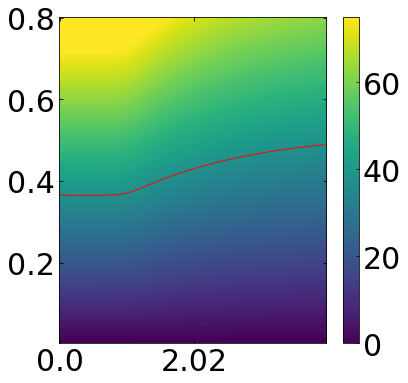

In [17]:
#Re-create Northern Cross Survey predictions (Pelliciari)
chan_bw = 16e6 #Hz
F_Jyms = 38 #Jy-ms
F = (1e-23)*F_Jyms*(100**2)/1000
wav = (3e8)/(408e6) #m
A = 0.71*11280 #m^2
G = 1#4*np.pi*A/(wav**2)

#plot rate vs gamma
gamma_array = np.linspace(0,4,100)
lambda_mag_array = np.linspace(0,0.8,200)[::-1]

all_rates = np.zeros((len(gamma_array),len(lambda_mag_array)))
uplim_rates = np.zeros(len(gamma_array))
print("Minimum Burst Energy for SGR-like burst in each galaxy:")
print("")
for j in range(len(Tobs_NC_ALL)):
    E_min = 4*np.pi*(D_NC_ALL[j]**2)*chan_bw*F/G#erg
    print(NC_GALAXIES[j] + " Emin: " + str(E_min) + " erg")

    for i in range(len(lambda_mag_array)):
        all_rates[:,i] += Rate_gamma(lambda_mag_array[i],gamma_array,SFR_NC_ALL[j],D_NC_ALL[j])*Tobs_NC_ALL[j]/np.sum(Tobs_NC_ALL)

plt.figure(figsize=(6,6))
plt.imshow(all_rates.transpose(),vmin=0,vmax=75,aspect="auto")
plt.colorbar()
plt.contour(all_rates.transpose(),color="red",levels=[38],colors="red")
print(plt.xticks())
plt.xticks(plt.xticks()[0][1:-1],labels=np.around(gamma_array[np.array(plt.xticks()[0][1:-1],dtype=int)],2))
plt.yticks(plt.yticks()[0][1:-1],labels=np.around(lambda_mag_array[np.array(plt.yticks()[0][1:-1],dtype=int)],2))

plt.show()



Minimum Burst Energy for SGR-like burst in M77:
M77 Emin: 1.6885341716645998e+35 erg
95% Confidence Poissonian Rate : 10.142872659930996 per year


/var/folders/v9/1gnwvy5s71q4513hp2rj_jxc0000gn/T/ipykernel_92485/3877268646.py:30: UserWarning: The following kwargs were not used by contour: 'color', 'linewidth'
  plt.contour(all_rates.transpose(),color="red",levels=[R_95],colors="red",linewidth=10)


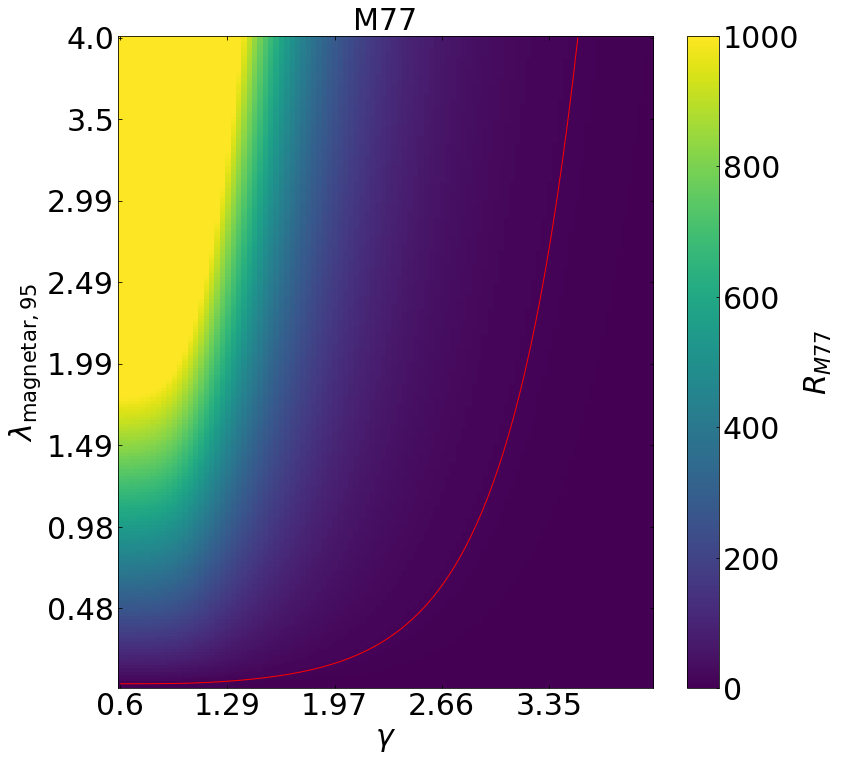

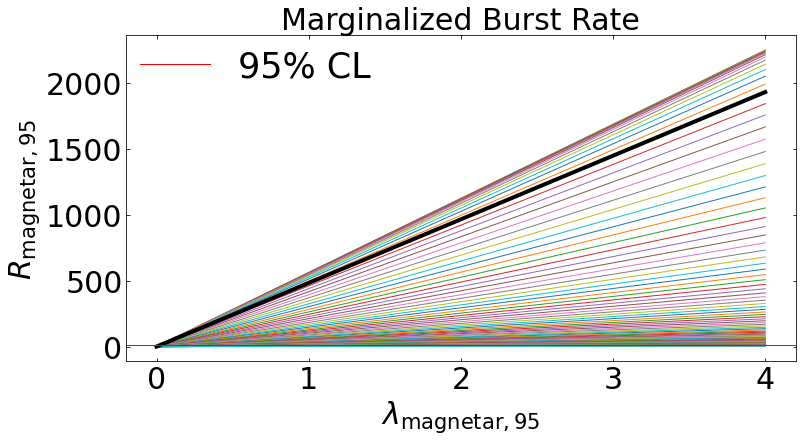

M77 Burst Rate per Magnetar (marginalized) <0.0201 bursts/magnetar/year at 95% confidence
M77 Burst Rate per Magnetar (marginalized) <2.01 bursts/magnetar/century at 95% confidence


In [37]:
#M77
#antenna parameters
chan_bw = 360e6 #Hz
F = (1e-23)*2*(100**2)/1000 #erg/(m2 Hz)  fluence threshold
wav = (3e8)/(8370e6) #m
A = np.pi*((34/2)**2) #eff. area, m^2
G = 1#4*np.pi*A/(wav**2)

gamma_array = np.linspace(0.6,4,100)
dgamma = gamma_array[1]-gamma_array[0]
lambda_mag_array = np.linspace(0,4,200)[::-1]

all_rates = np.zeros((len(gamma_array),len(lambda_mag_array)))

print("Minimum Burst Energy for SGR-like burst in M77:")
E_min = 4*np.pi*(D_M77**2)*chan_bw*F/G#erg
print("M77 Emin: " + str(E_min) + " erg")
for i in range(len(lambda_mag_array)):
    all_rates[:,i] += Rate_gamma(lambda_mag_array[i],gamma_array,SFR_M77,D_M77)


R_95 = -np.log(0.95)/((Tobs_M77)/(24*365)) #95% confidence level
print("95% Confidence Poissonian Rate : " + str(R_95) + " per year")


plt.figure(figsize=(12,12))
plt.title("M77")
plt.imshow(all_rates.transpose(),vmin=0,vmax=1000,aspect="auto")
plt.colorbar(label=r'$R_{M77}$')
plt.contour(all_rates.transpose(),color="red",levels=[R_95],colors="red",linewidth=10)
#print(plt.xticks())
plt.xticks(plt.xticks()[0][1:-1],labels=np.around(gamma_array[np.array(plt.xticks()[0][1:-1],dtype=int)],2))
plt.yticks(plt.yticks()[0][1:-1],labels=np.around(lambda_mag_array[np.array(plt.yticks()[0][1:-1],dtype=int)],2))
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\lambda_{\rm magnetar,95}$')
plt.savefig("M77_rate.pdf")
plt.show()

#marginalize over gamma
marg_rate = np.sum(all_rates,axis=0)*dgamma

plt.figure(figsize=(12,6))
plt.title("Marginalized Burst Rate")
for i in range(len(gamma_array)):
    plt.plot(lambda_mag_array,all_rates[i,:])
plt.plot(lambda_mag_array,marg_rate,color="black",linewidth=4)
plt.xlabel(r'$\lambda_{\rm magnetar,95}$')
plt.ylabel(r'$R_{\rm magnetar,95}$')
plt.axhline(R_95,color="red",label="95% CL")
plt.legend(loc="upper left")
plt.show()

#get per-magnetar upper limit at 95% Confidence

lambda_95 = lambda_mag_array[np.argmin(np.abs(R_95-marg_rate))]
print("M77 Burst Rate per Magnetar (marginalized) <" + str(np.around(lambda_95,4)) + " bursts/magnetar/year at 95% confidence")
print("M77 Burst Rate per Magnetar (marginalized) <" + str(np.around(100*lambda_95,2)) + " bursts/magnetar/century at 95% confidence")

Minimum Burst Energy for SGR-like burst in M82:
M82 Emin: 1.0553338572903749e+34 erg
95% Confidence Poissonian Rate : 12.948969995243315 per year


/var/folders/v9/1gnwvy5s71q4513hp2rj_jxc0000gn/T/ipykernel_92485/1781992418.py:28: UserWarning: The following kwargs were not used by contour: 'color', 'linewidth'
  plt.contour(all_rates.transpose(),color="red",levels=[R_95],colors="red",linewidth=10)


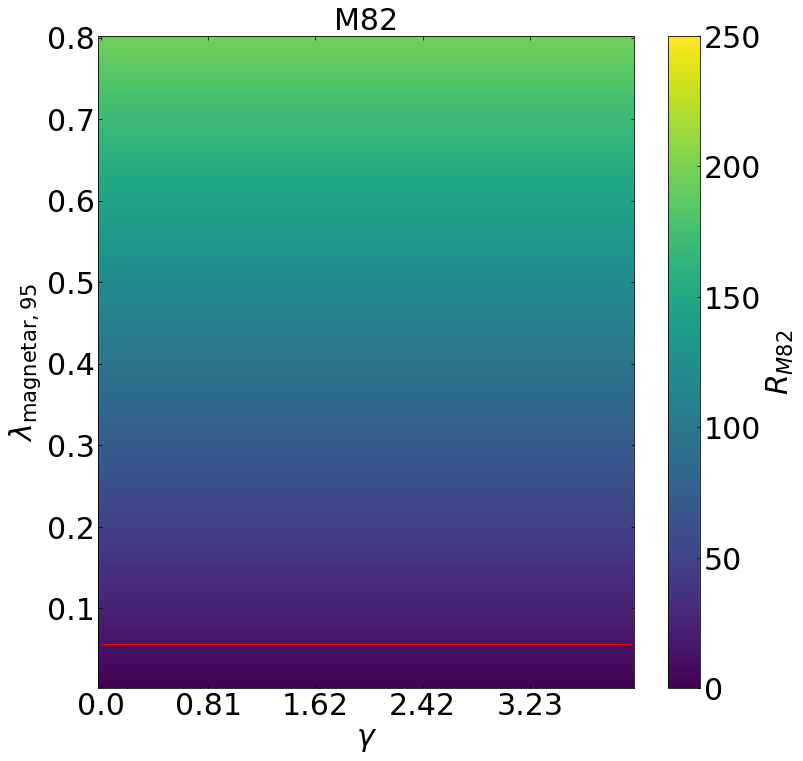

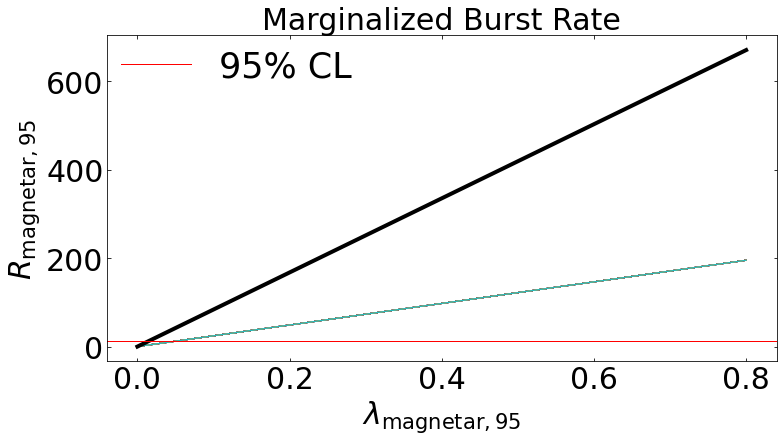

M82 Burst Rate per Magnetar <0.0523 bursts/magnetar/year at 95% confidence
M82 Burst Rate per Magnetar <5.23 bursts/magnetar/century at 95% confidence


In [38]:
#M82
#antenna parameters
chan_bw = 360e6 #Hz
F = (1e-23)*2*(100**2)/1000 #erg/(m2 Hz)  fluence threshold
wav = (3e8)/(8370e6) #m
A = np.pi*((34/2)**2) #eff. area, m^2
G = 1#4*np.pi*A/(wav**2)

gamma_array = np.linspace(0,4,100)
lambda_mag_array = np.linspace(0,0.8,200)[::-1]

all_rates = np.zeros((len(gamma_array),len(lambda_mag_array)))

print("Minimum Burst Energy for SGR-like burst in M82:")
E_min = 4*np.pi*(D_M82**2)*chan_bw*F/G#erg
print("M82 Emin: " + str(E_min) + " erg")
for i in range(len(lambda_mag_array)):
    all_rates[:,i] += Rate_gamma(lambda_mag_array[i],gamma_array,SFR_M82,D_M82)

    
R_95 = -np.log(0.95)/((Tobs_M82)/(24*365)) #95% confidence level
print("95% Confidence Poissonian Rate : " + str(R_95) + " per year")

plt.figure(figsize=(12,12))
plt.title("M82")
plt.imshow(all_rates.transpose(),vmin=0,vmax=250,aspect="auto")
plt.colorbar(label=r'$R_{M82}$')
plt.contour(all_rates.transpose(),color="red",levels=[R_95],colors="red",linewidth=10)
#print(plt.xticks())
plt.xticks(plt.xticks()[0][1:-1],labels=np.around(gamma_array[np.array(plt.xticks()[0][1:-1],dtype=int)],2))
plt.yticks(plt.yticks()[0][1:-1],labels=np.around(lambda_mag_array[np.array(plt.yticks()[0][1:-1],dtype=int)],2))
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\lambda_{\rm magnetar,95}$')
plt.savefig("M82_rate.pdf")
plt.show()

#marginalize over gamma
marg_rate = np.sum(all_rates,axis=0)*dgamma

plt.figure(figsize=(12,6))
plt.title("Marginalized Burst Rate")
for i in range(len(gamma_array)):
    plt.plot(lambda_mag_array,all_rates[i,:])
plt.plot(lambda_mag_array,marg_rate,color="black",linewidth=4)
plt.xlabel(r'$\lambda_{\rm magnetar,95}$')
plt.ylabel(r'$R_{\rm magnetar,95}$')
plt.axhline(R_95,color="red",label="95% CL")
plt.legend(loc="upper left")
plt.show()


#get per-magnetar upper limit at 95% Confidence

lambda_95 = lambda_mag_array[np.argmin(np.abs(R_95-all_rates[0,:]))]
print("M82 Burst Rate per Magnetar <" + str(np.around(lambda_95,4)) + " bursts/magnetar/year at 95% confidence")
print("M82 Burst Rate per Magnetar <" + str(np.around(100*lambda_95,2)) + " bursts/magnetar/century at 95% confidence")

5.687712137151178
(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]), [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])


/var/folders/v9/1gnwvy5s71q4513hp2rj_jxc0000gn/T/ipykernel_92485/3304632761.py:29: UserWarning: The following kwargs were not used by contour: 'color', 'linewidth'
  plt.contour(all_rates.transpose(),color="red",levels=[R_95],colors="red",linewidth=10)


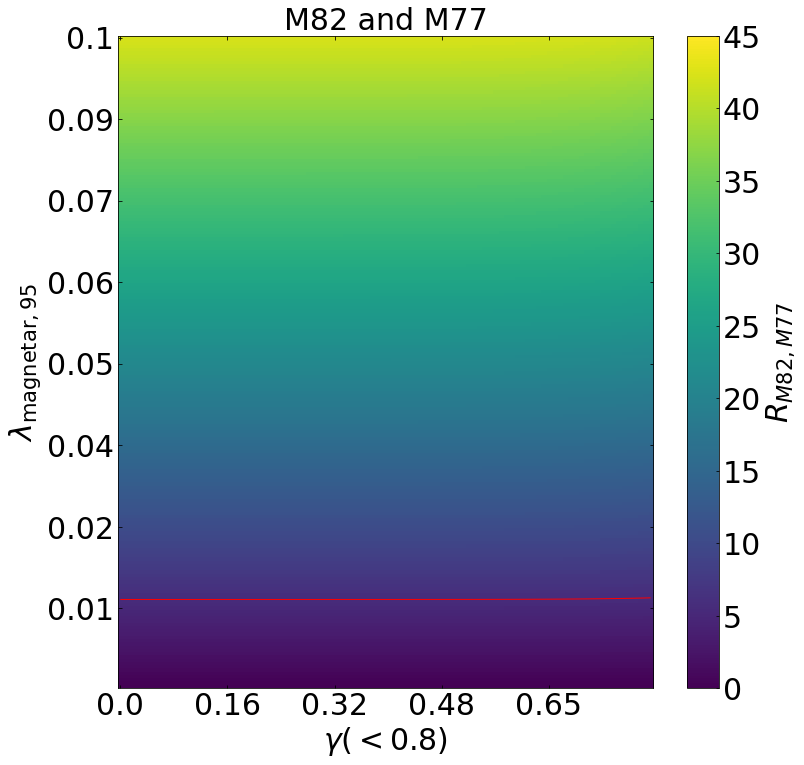

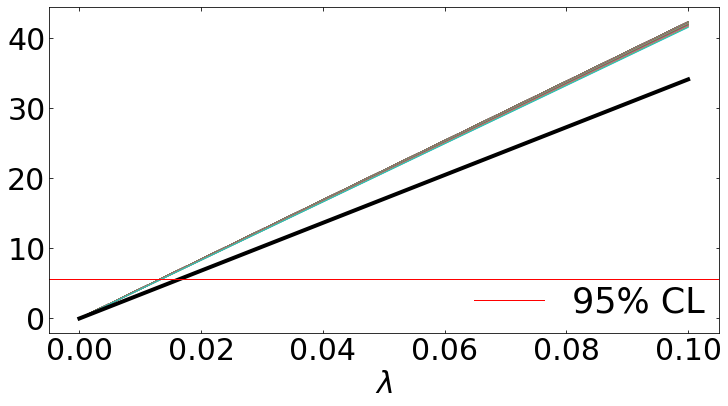

M77 & M82 Burst Rate per Magnetar (for gamma < 0.8) <0.0136 bursts/magnetar/year at 95% confidence
M77 & M82 Burst Rate per Magnetar (for gamma < 0.8) <1.36 bursts/magnetar/century at 95% confidence
5.687712137151178
(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]), [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])


/var/folders/v9/1gnwvy5s71q4513hp2rj_jxc0000gn/T/ipykernel_92485/3304632761.py:76: UserWarning: The following kwargs were not used by contour: 'color', 'linewidth'
  plt.contour(all_rates.transpose(),color="red",levels=[R_95],colors="red",linewidth=10)


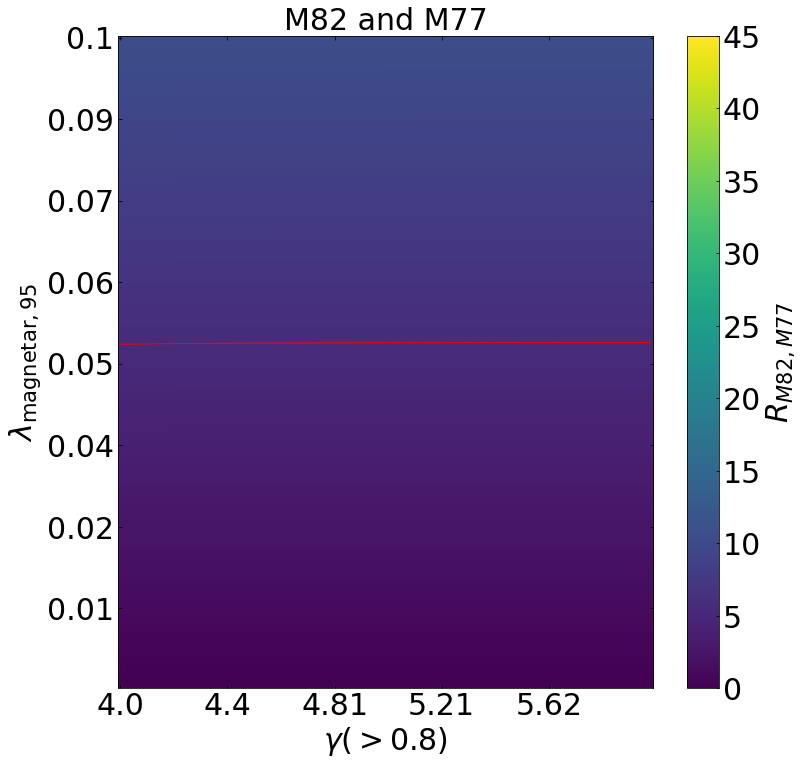

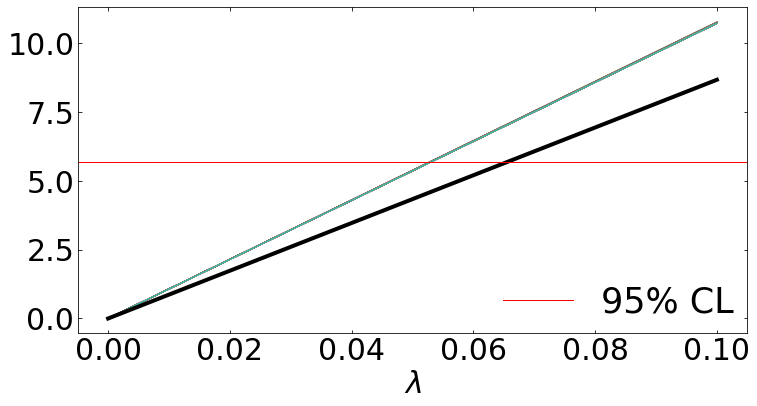

M77 & M82 Burst Rate per Magnetar (for gamma > 4) <0.0528 bursts/magnetar/year at 95% confidence
M77 & M82 Burst Rate per Magnetar (for gamma > 4) <5.28 bursts/magnetar/century at 95% confidence
5.687712137151178
(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]), [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])


/var/folders/v9/1gnwvy5s71q4513hp2rj_jxc0000gn/T/ipykernel_92485/3304632761.py:146: UserWarning: The following kwargs were not used by contour: 'color', 'linewidth'
  plt.contour(all_rates.transpose(),color="red",levels=[R_95],colors="red",linewidth=10)


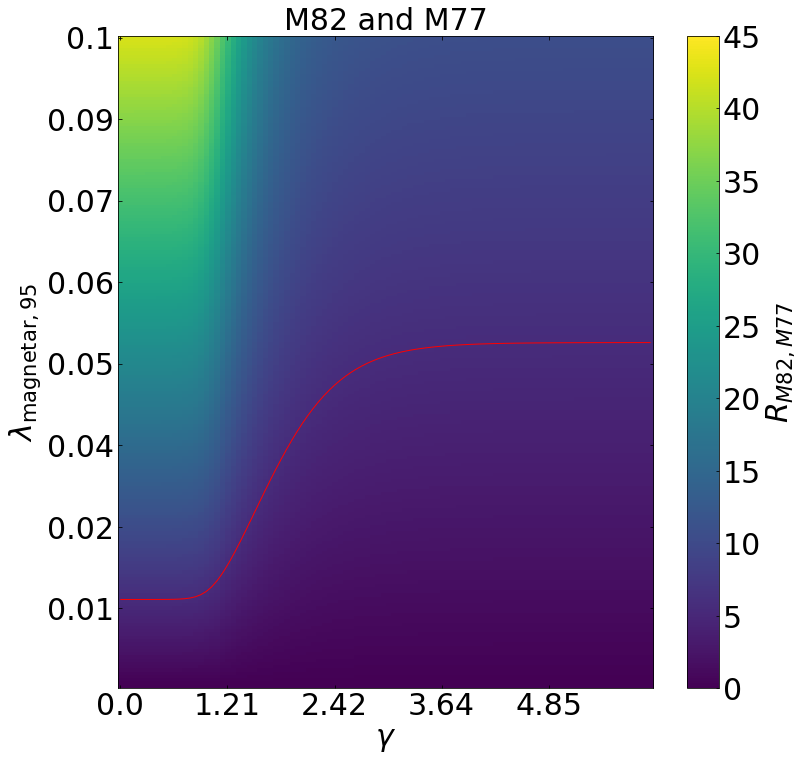

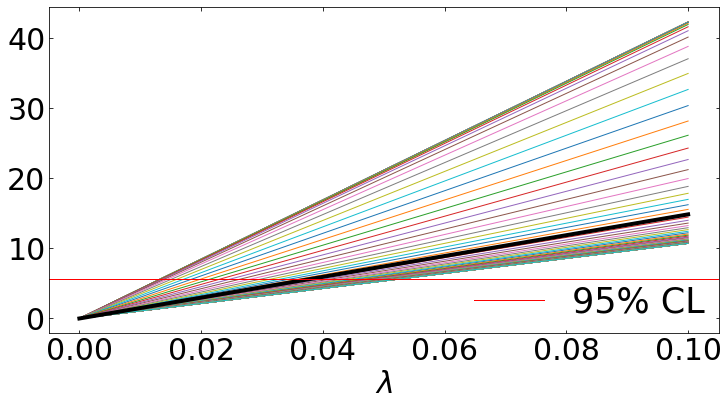

M77 & M82 Burst Rate per Magnetar (marginalized) <0.0382 bursts/magnetar/year at 95% confidence
M77 & M82 Burst Rate per Magnetar (marginalized) <3.82 bursts/magnetar/century at 95% confidence


In [45]:
#M82 + M77


### FIRST FOR GAMMA < 0.8

#antenna parameters
chan_bw = 360e6 #Hz
F = (1e-23)*2*(100**2)/1000 #erg/(m2 Hz)  fluence threshold
wav = (3e8)/(8370e6) #m
A = np.pi*((34/2)**2) #eff. area, m^2
G = 1#4*np.pi*A/(wav**2)

gamma_array = np.linspace(0,0.8,100)
dgamma = np.abs(gamma_array[1]-gamma_array[0])
lambda_mag_array = np.linspace(0,0.1,200)[::-1]

all_rates = np.zeros((len(gamma_array),len(lambda_mag_array)))

for i in range(len(lambda_mag_array)):
    all_rates[:,i] += Rate_gamma(lambda_mag_array[i],gamma_array,SFR_M82,D_M82)*Tobs_M82/(Tobs_M82+Tobs_M77)
    all_rates[:,i] += Rate_gamma(lambda_mag_array[i],gamma_array,SFR_M77,D_M77)*Tobs_M77/(Tobs_M82+Tobs_M77)

R_95 = -np.log(0.95)/((Tobs_M77 + Tobs_M82)/(24*365)) #95% confidence level
print(R_95)
plt.figure(figsize=(12,12))
plt.title("M82 and M77")
plt.imshow(all_rates.transpose(),vmin=0,vmax=45,aspect="auto")
plt.colorbar(label=r'$R_{M82,M77}$')
plt.contour(all_rates.transpose(),color="red",levels=[R_95],colors="red",linewidth=10)
print(plt.xticks())
plt.xticks(plt.xticks()[0][1:-1],labels=np.around(gamma_array[np.array(plt.xticks()[0][1:-1],dtype=int)],2))
plt.yticks(plt.yticks()[0][1:-1],labels=np.around(lambda_mag_array[np.array(plt.yticks()[0][1:-1],dtype=int)],2))
plt.xlabel(r'$\gamma (<0.8)$')
plt.ylabel(r'$\lambda_{\rm magnetar,95}$')
#plt.savefig("M82_M77_rate.pdf")
plt.show()



#marginalize over gamma
marg_rate = np.sum(all_rates,axis=0)*dgamma

plt.figure(figsize=(12,6))
for i in range(len(gamma_array)):
    plt.plot(lambda_mag_array,all_rates[i,:])
plt.plot(lambda_mag_array,marg_rate,color="black",linewidth=4)
plt.xlabel(r'$\lambda$')
plt.axhline(R_95,color="red",label="95% CL")
plt.legend()
plt.show()


#get per-magnetar upper limit at 95% Confidence

lambda_95 = lambda_mag_array[np.argmin(np.abs(R_95-all_rates[0,:]))]
print("M77 & M82 Burst Rate per Magnetar (for gamma < 0.8) <" + str(np.around(lambda_95,4)) + " bursts/magnetar/year at 95% confidence")
print("M77 & M82 Burst Rate per Magnetar (for gamma < 0.8) <" + str(np.around(100*lambda_95,2)) + " bursts/magnetar/century at 95% confidence")


### NEXT FOR GAMMA > 0.8
gamma_array = np.linspace(4,6,100)
lambda_mag_array = np.linspace(0,0.1,200)[::-1]

all_rates = np.zeros((len(gamma_array),len(lambda_mag_array)))

for i in range(len(lambda_mag_array)):
    all_rates[:,i] += Rate_gamma(lambda_mag_array[i],gamma_array,SFR_M82,D_M82)*Tobs_M82/(Tobs_M82+Tobs_M77)
    all_rates[:,i] += Rate_gamma(lambda_mag_array[i],gamma_array,SFR_M77,D_M77)*Tobs_M77/(Tobs_M82+Tobs_M77)

R_95 = -np.log(0.95)/((Tobs_M77 + Tobs_M82)/(24*365)) #95% confidence level
print(R_95)
plt.figure(figsize=(12,12))
plt.title("M82 and M77")
plt.imshow(all_rates.transpose(),vmin=0,vmax=45,aspect="auto")
plt.colorbar(label=r'$R_{M82,M77}$')
plt.contour(all_rates.transpose(),color="red",levels=[R_95],colors="red",linewidth=10)
print(plt.xticks())
plt.xticks(plt.xticks()[0][1:-1],labels=np.around(gamma_array[np.array(plt.xticks()[0][1:-1],dtype=int)],2))
plt.yticks(plt.yticks()[0][1:-1],labels=np.around(lambda_mag_array[np.array(plt.yticks()[0][1:-1],dtype=int)],2))
plt.xlabel(r'$\gamma (>0.8)$')
plt.ylabel(r'$\lambda_{\rm magnetar,95}$')
#plt.savefig("M82_M77_rate.pdf")
plt.show()


#marginalize over gamma
marg_rate = np.sum(all_rates,axis=0)*dgamma

plt.figure(figsize=(12,6))
for i in range(len(gamma_array)):
    plt.plot(lambda_mag_array,all_rates[i,:])
plt.plot(lambda_mag_array,marg_rate,color="black",linewidth=4)
plt.xlabel(r'$\lambda$')
plt.axhline(R_95,color="red",label="95% CL")
plt.legend()
plt.show()


#get per-magnetar upper limit at 95% Confidence

lambda_95 = lambda_mag_array[np.argmin(np.abs(R_95-all_rates[0,:]))]
print("M77 & M82 Burst Rate per Magnetar (for gamma > 4) <" + str(np.around(lambda_95,4)) + " bursts/magnetar/year at 95% confidence")
print("M77 & M82 Burst Rate per Magnetar (for gamma > 4) <" + str(np.around(100*lambda_95,2)) + " bursts/magnetar/century at 95% confidence")

### LAST FOR ALL GAMMA

gamma_array = np.linspace(0,6,100)
lambda_mag_array = np.linspace(0,0.1,200)[::-1]

all_rates = np.zeros((len(gamma_array),len(lambda_mag_array)))

for i in range(len(lambda_mag_array)):
    all_rates[:,i] += Rate_gamma(lambda_mag_array[i],gamma_array,SFR_M82,D_M82)*Tobs_M82/(Tobs_M82+Tobs_M77)
    all_rates[:,i] += Rate_gamma(lambda_mag_array[i],gamma_array,SFR_M77,D_M77)*Tobs_M77/(Tobs_M82+Tobs_M77)

R_95 = -np.log(0.95)/((Tobs_M77 + Tobs_M82)/(24*365)) #95% confidence level
print(R_95)



fsize=30
fsize2=35
plt.rcParams.update({
                    'font.size': fsize,
                    'font.family': 'sans-serif',
                    'axes.labelsize': fsize,
                    'axes.titlesize': fsize,
                    'xtick.labelsize': fsize,
                    'ytick.labelsize': fsize,
                    'xtick.direction': 'in',
                    'ytick.direction': 'in',
                    'xtick.top': True,
                    'ytick.right': True,
                    'lines.linewidth': 1,
                    'lines.markersize': 5,
                    'legend.fontsize': fsize2,
                    'legend.borderaxespad': 0,
                    'legend.frameon': False,
                    'legend.loc': 'lower right'})


plt.figure(figsize=(12,12))
plt.title("M82 and M77")
plt.imshow(all_rates.transpose(),vmin=0,vmax=45,aspect="auto")
plt.colorbar(label=r'$R_{M82,M77}$')
plt.contour(all_rates.transpose(),color="red",levels=[R_95],colors="red",linewidth=10)
print(plt.xticks())
plt.xticks(plt.xticks()[0][1:-1],labels=np.around(gamma_array[np.array(plt.xticks()[0][1:-1],dtype=int)],2))
plt.yticks(plt.yticks()[0][1:-1],labels=np.around(lambda_mag_array[np.array(plt.yticks()[0][1:-1],dtype=int)],2))
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\lambda_{\rm magnetar,95}$')
plt.savefig("M82_M77_rate.pdf")
plt.show()


#marginalize over gamma
marg_rate = np.sum(all_rates,axis=0)*dgamma

plt.figure(figsize=(12,6))
for i in range(len(gamma_array)):
    plt.plot(lambda_mag_array,all_rates[i,:])
plt.plot(lambda_mag_array,marg_rate,color="black",linewidth=4)
plt.xlabel(r'$\lambda$')
plt.axhline(R_95,color="red",label="95% CL")
plt.legend()
plt.show()


#get per-magnetar upper limit at 95% Confidence

lambda_95 = lambda_mag_array[np.argmin(np.abs(R_95-marg_rate))]
print("M77 & M82 Burst Rate per Magnetar (marginalized) <" + str(np.around(lambda_95,4)) + " bursts/magnetar/year at 95% confidence")
print("M77 & M82 Burst Rate per Magnetar (marginalized) <" + str(np.around(100*lambda_95,2)) + " bursts/magnetar/century at 95% confidence")

# Scratch

In [ ]:
##########################################################################################################

gamma_array = np.linspace(4,6,100)
lambda_mag_array = np.linspace(0,0.1,200)[::-1]

all_rates = np.zeros((len(gamma_array),len(lambda_mag_array)))
print("Minimum Burst Energy for SGR-like burst in M77:")
E_min = 4*np.pi*(D_M77**2)*chan_bw*F/G#erg
print("M77 Emin: " + str(E_min) + " erg")
print("")
print("Minimum Burst Energy for SGR-like burst in M82:")
E_min = 4*np.pi*(D_M82**2)*chan_bw*F/G#erg
print("M82 Emin: " + str(E_min) + " erg")
for i in range(len(lambda_mag_array)):
    all_rates[:,i] += Rate_gamma(lambda_mag_array[i],gamma_array,SFR_M82,D_M82)*Tobs_M82/(Tobs_M82+Tobs_M77)
    all_rates[:,i] += Rate_gamma(lambda_mag_array[i],gamma_array,SFR_M77,D_M77)*Tobs_M77/(Tobs_M82+Tobs_M77)

R_95 = -np.log(0.95)/((Tobs_M77 + Tobs_M82)/(24*365)) #95% confidence level
print(R_95)
plt.figure(figsize=(6,6))
plt.imshow(all_rates.transpose(),vmin=0,vmax=500,aspect="auto")
plt.colorbar()
plt.contour(all_rates.transpose(),color="red",levels=[R_95],colors="red")
print(plt.xticks())
plt.xticks(plt.xticks()[0][1:-1],labels=np.around(gamma_array[np.array(plt.xticks()[0][1:-1],dtype=int)],2))
plt.yticks(plt.yticks()[0][1:-1],labels=np.around(lambda_mag_array[np.array(plt.yticks()[0][1:-1],dtype=int)],2))

plt.show()


#marginalize over gamma
marg_rate = np.sum(all_rates,axis=0)*dgamma

plt.figure(figsize=(12,6))
for i in range(len(gamma_array)):
    plt.plot(lambda_mag_array,all_rates[i,:])
plt.plot(lambda_mag_array,marg_rate,color="black",linewidth=4)
plt.xlabel(r'$\lambda$')
plt.axhline(R_95,color="red",label="95% CL")
plt.legend()
plt.show()

